In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns
import requests as req
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [98]:
consumer_key = "BG1x5m4Dx36FrrM4b5LqEIeaR"
consumer_secret = "oUZMYEk2dZOkMFweOAXT3eUSQ1qyC77MNJQ5tIkNXoY2tiAH16"
access_token = "78477373-PWObRUH8OXRSl51ZcqLzhUzFSNS4u9NkJIjhjD6xp"
access_token_secret = "Yxr2gOreDbLw6V2izpijPGfIflhOop0KEszHFr2AFyDUr"

In [99]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [100]:
news = ["@nytimes", "@CBS", "@CNN", "@FoxNews", "@BBC"]

In [101]:
text = []
date = []
source = []
compoundlist = []
positivescore = []
negativescore = []
neutralscore = []
username = []

In [102]:
for newsoutlet in news:
    tweets = api.search(newsoutlet, count = 100, result_type = "recent")
    for tweet in tweets["statuses"]:
        source.append(newsoutlet)
        comp= analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        compoundlist.append(comp)
        positivescore.append(pos)
        negativescore.append(neg)
        neutralscore.append(neu)
        username.append(tweet["user"]["name"])
        date.append(tweet["created_at"])
        text.append(tweet["text"])

In [103]:
# Convert sentiments to DataFrame
df = pd.DataFrame({"comp":compoundlist, "pos":positivescore, "neg":negativescore, "neu":neutralscore, "username":username, "text": text, "date":date, "source":source})
df

,comp,date,neg,neu,pos,source,text,username
0,-0.6908,Fri Feb 02 16:55:33 +0000 2018,0.235,0.684,0.081,@nytimes,RT @nytimes: A bill in Poland sets prison pena...,R Ray
1,0.1082,Fri Feb 02 16:55:33 +0000 2018,0.120,0.738,0.142,@nytimes,@Shakestweetz @nytimes Wish I still had a subs...,SLTinDE
2,-0.6908,Fri Feb 02 16:55:32 +0000 2018,0.235,0.684,0.081,@nytimes,RT @nytimes: A bill in Poland sets prison pena...,Expat Fledgling
3,-0.1779,Fri Feb 02 16:55:31 +0000 2018,0.138,0.753,0.109,@nytimes,@Shakestweetz @nytimes Dear @nytdavidbrooks\n\...,Corin BarsilyGoodwin
4,0.0000,Fri Feb 02 16:55:31 +0000 2018,0.000,1.000,0.000,@nytimes,RT @AlokPattani: Thoughts on @nytimes piece on...,In Bill We Trust
5,-0.5829,Fri Feb 02 16:55:28 +0000 2018,0.201,0.799,0.000,@nytimes,Are you guys really that desperate for writers...,Sean McCabe
6,0.2500,Fri Feb 02 16:55:24 +0000 2018,0.000,0.905,0.095,@nytimes,RT @nytimes: We answer your questions about ap...,Diana Villegas
7,-0.7003,Fri Feb 02 16:55:20 +0000 2018,0.225,0.775,0.000,@nytimes,RT @nytimes: The White House has grown frustra...,"Grand Moff Snarkin, Malignant Professional"
8,0.2500,Fri Feb 02 16:55:16 +0000 2018,0.000,0.905,0.095,@nytimes,RT @nytimes: We answer your questions about ap...,chabeli
9,0.2500,Fri Feb 02 16:55:16 +0000 2018,0.000,0.905,0.095,@nytimes,RT @nytimes: We answer your questions about ap...,Summit_R_Biswaz


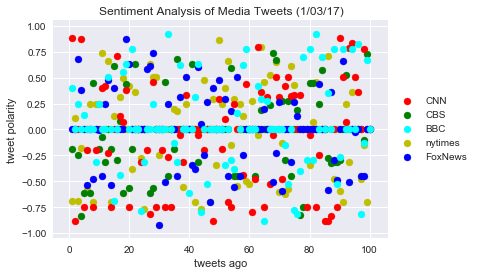

In [118]:
counter=0
counter1=0
counter2=0
counter3=0
counter4=0
for index, row in df.iterrows():
    if (row["source"]=="@CNN"):
        counter=counter+1
        CNN=plt.scatter(counter,row["comp"],c="r",marker="o")
    if (row["source"]=="@CBS"):
        counter1=counter1+1
        CBS=plt.scatter(counter1,row["comp"],c="g",marker="o")
    if (row["source"]=="@BBC"):
        counter2=counter2+1
        BBC=plt.scatter(counter2,row["comp"],c="cyan",marker="o")
    if (row["source"]=="@nytimes"):
        counter3=counter3+1
        nytimes=plt.scatter(counter3,row["comp"],c="y",marker="o")
    if (row["source"]=="@FoxNews"):
        counter4=counter4+1
        FoxNews=plt.scatter(counter4,row["comp"],c="b",marker="o")
        
plt.xlabel("tweets ago")
plt.ylabel("tweet polarity")
plt.legend(handles=[CNN,CBS,BBC,nytimes,FoxNews],labels=["CNN", "CBS", "BBC", "nytimes", "FoxNews"], loc="center left",bbox_to_anchor=(1,0.5))
plt.title("Sentiment Analysis of Media Tweets (1/03/17)")
plt.show()

In [111]:
df2 = pd.DataFrame(df.groupby("source")["comp"].mean())
df2

,comp
source,
@BBC,0.042660
@CBS,-0.022167
@CNN,-0.056635
@FoxNews,0.001249
@nytimes,-0.002637


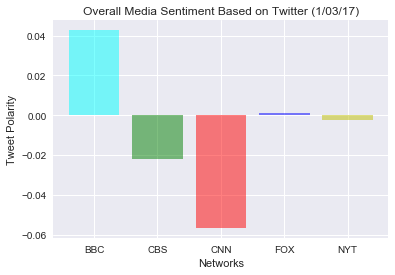

In [119]:
x_axis = np.arange(len(df2["comp"]))
compound_score = df2["comp"]
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "FOX", "NYT"])
plt.bar(x_axis, compound_score, color = ['cyan','g','r','b','y'], alpha=0.5, align="edge")
plt.xlabel("Networks")
plt.ylabel("Tweet Polarity")
plt.title("Overall Media Sentiment Based on Twitter (1/03/17)")
sns.set()
plt.show()